# Task 1- Iris Flowers Classification ML Project

**Link for the dataset:** http://archive.ics.uci.edu/ml/datasets/Iris

The dataset contains **3 classes** of **50 instances** each, where each class refers to a type of **iris plant**. 
 
**Number of Instances:** 150 (50 in each of three classes)

**Number of Attributes:** 4 numeric, predictive attributes and the class

**Attribute Information:**
  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm
  5. class: Iris Setosa, Iris Versicolour, Iris Virginica

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report

## Load the dataset

In [2]:
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#drop Id column
df=df.drop("Id",axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Handling null value

In [7]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There is no null value present in dataset

In [8]:
df.value_counts("Species")

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

## Data Visualization

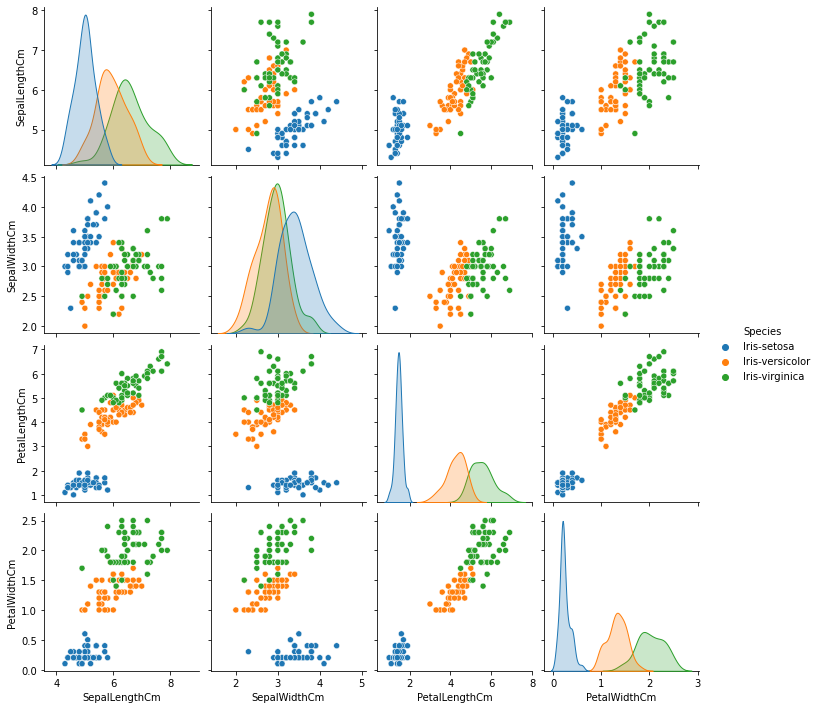

In [9]:
sns.pairplot(df,hue='Species')

iris-setosa is separated well from the other two flowers.

iris-setosa has small petal width and length but larger sepal width.

<AxesSubplot:xlabel='Species', ylabel='count'>

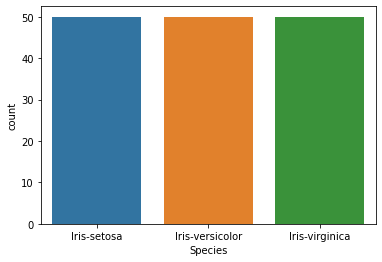

In [10]:
sns.countplot(x="Species",data=df)

## Handling Outliers

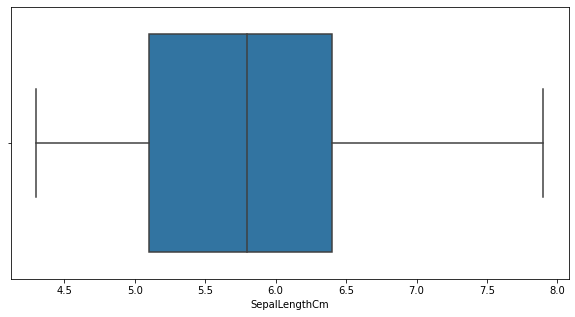

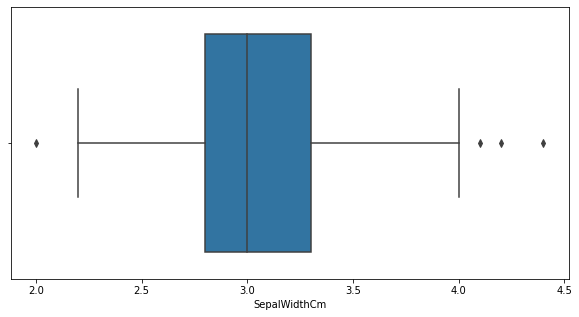

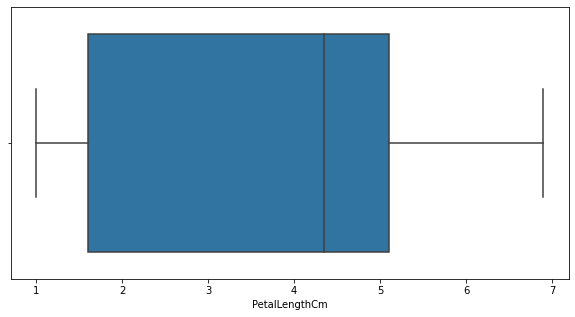

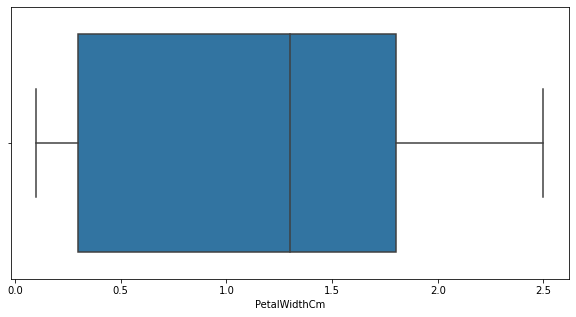

In [11]:
for column in df.columns[0:-1]:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=(column),data=df)

In [12]:
Q1=df['SepalWidthCm'].quantile(0.25)
Q3=df['SepalWidthCm'].quantile(0.75)
IQR=Q3-Q1
print ("IQR: ",IQR)
lower_limit=Q1-(1.5*IQR)
print("lower_limit: ",lower_limit)
upper_limit=Q3+(1.5*IQR)
print("upper_limit: ",upper_limit)
df['SepalWidthCm']=np.where(df['SepalWidthCm']<lower_limit,lower_limit,df['SepalWidthCm'])
df['SepalWidthCm']=np.where(df['SepalWidthCm']>upper_limit,upper_limit,df['SepalWidthCm'])

IQR:  0.5
lower_limit:  2.05
upper_limit:  4.05


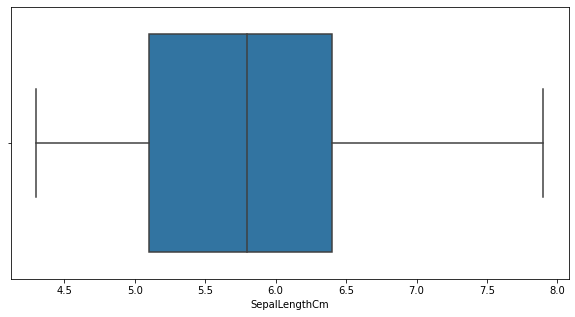

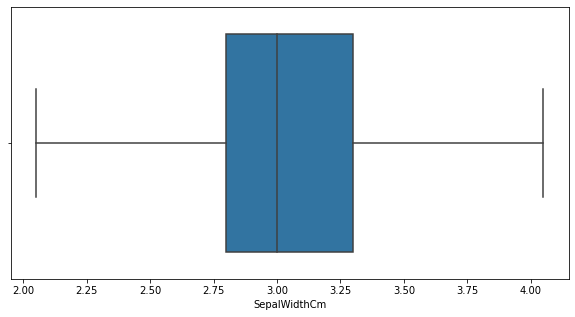

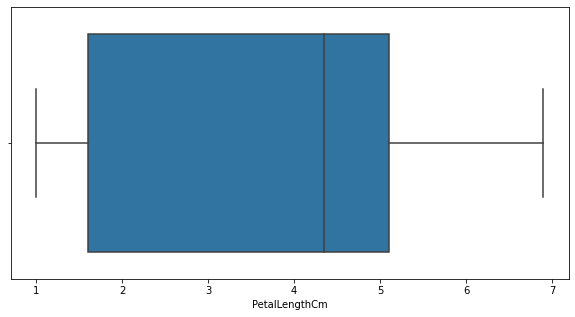

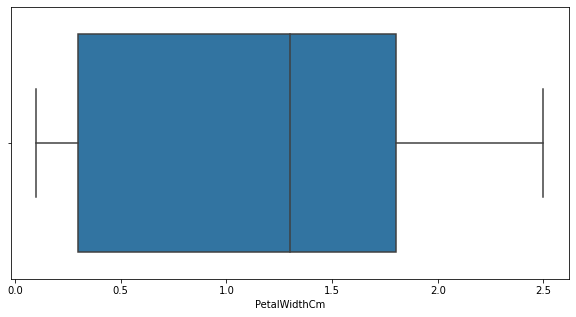

In [13]:
for column in df.columns[0:-1]:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=(column),data=df)

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(df['Species'])
df['Species']=encoder.fit_transform(df['Species'])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
encoder_name_mapping=dict(zip(encoder.classes_,encoder.transform(encoder.classes_)))
print(encoder_name_mapping)

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


In [16]:
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

## Data Splitting

In [17]:
y= df['Species'].copy()
X= df.drop('Species', axis=1)

In [18]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
X.shape

(150, 4)

In [20]:
y.shape

(150,)

In [21]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state = 123)

In [22]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
130,7.4,2.8,6.1,1.9
119,6.0,2.2,5.0,1.5
29,4.7,3.2,1.6,0.2
0,5.1,3.5,1.4,0.2
62,6.0,2.2,4.0,1.0
...,...,...,...,...
17,5.1,3.5,1.4,0.3
98,5.1,2.5,3.0,1.1
66,5.6,3.0,4.5,1.5
126,6.2,2.8,4.8,1.8


In [23]:
y_train

130    2
119    2
29     0
0      0
62     1
      ..
17     0
98     1
66     1
126    2
109    2
Name: Species, Length: 120, dtype: int32

In [24]:
(X_train.shape),(y_train.shape)

((120, 4), (120,))

## Model Training and Evaluation

In [25]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR.score(X_test, y_test)*100

100.0

In [26]:
y_pred_LR = LR.predict(X_test)
y_pred_LR

array([1, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2,
       0, 2, 0, 0, 0, 2, 2, 0])

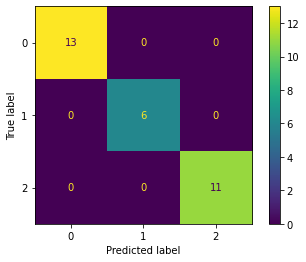

In [27]:
print(plot_confusion_matrix(LR,X_test,y_test))

In [28]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [29]:
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(X_train,y_train)
svc_model.score(X_test, y_test)*100

96.66666666666667

In [30]:
y_pred_svc=svc_model.predict(X_test)

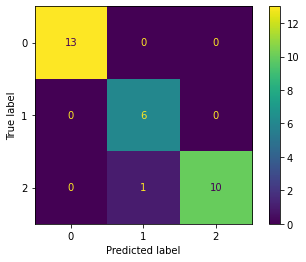

In [31]:
print(plot_confusion_matrix(svc_model,X_test,y_test))

In [32]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      1.00      0.92         6
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [33]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=10, criterion='entropy')
rf_model.fit(X_train,y_train)
rf_model.score(X_test,y_test)*100

86.66666666666667

In [34]:
y_pred_rf=rf_model.predict(X_test)

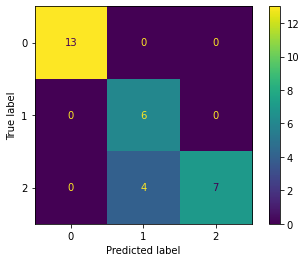

In [35]:
print(plot_confusion_matrix(rf_model,X_test,y_test))

In [36]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.60      1.00      0.75         6
           2       1.00      0.64      0.78        11

    accuracy                           0.87        30
   macro avg       0.87      0.88      0.84        30
weighted avg       0.92      0.87      0.87        30

